In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9.0, 5.0)

# Discrete Fourier Transform

I cannot demonstrate an analytic fourier transform on a computer (any guesses why?) so I am going to start with computing the discrete fourier tranform of a single sine wave.

The DFT formula is given by:
$$X_k = \Sigma_{n=0}^{N-1} x_n e^{2\pi i nk/N}$$

## Time Domain Signal

We will first create the time series that we will fourier transform later. You can experiment below by changing the number of samples and signal frequency and observe the effect it has on the discrete fourier transform. 

<IPython.core.display.Javascript object>


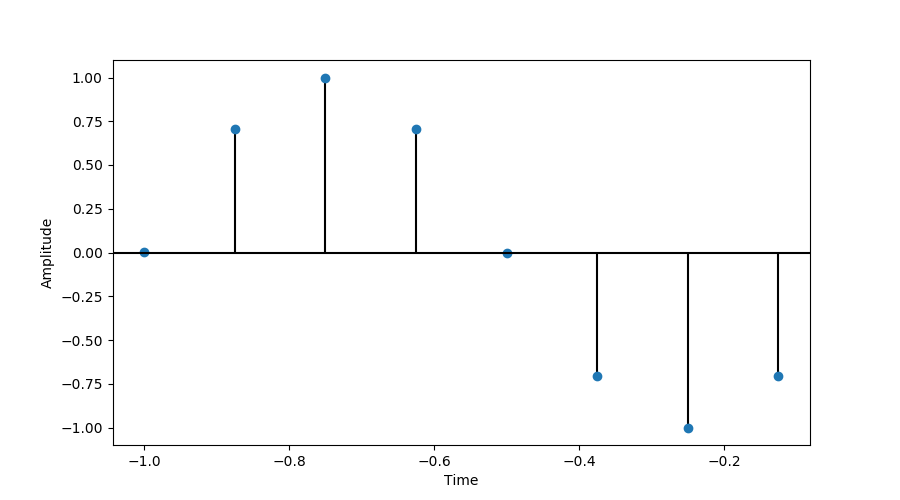

In [2]:
# Number of samples
N = 8

# Signal frequency
v_sig = 1 #Hz

# Time duration of signal
T0 = 1 #s

if (N%2 ==0):
    t = np.linspace(-T0/2,T0/2,num=N,endpoint=False)
else:
    t = np.linspace(-T0/2,T0/2,num=N)
xn = np.sin(2*np.pi*v_sig*t)

fig,ax = plt.subplots(1,1)
ax.plot(t,xn,'o')
ax.vlines(x=t,ymin=0,ymax=xn)
ax.axhline(0,c='k')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')

## Frequency Domain Signal

The frequency domain signal is given by the fourier transform of the time domain signal. Using the formula above, we compute the summation for each $k$ bin.

### What do you expect the output to be??

If you had to make a naive (but intelligent) guess, you could argue that- the fourier transform represents the frequencies present in your input function => fourier transform of sine wave should have only one non-zero Fk, corresponding to the input frequency.

Check out the output by running the code below! If you're baffled, read the section on *negative frequencies*.

<IPython.core.display.Javascript object>


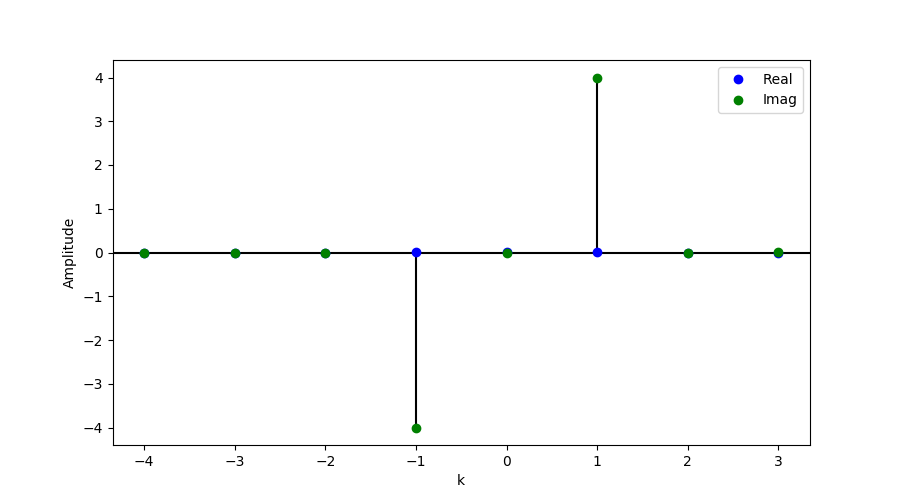

In [3]:
Xk = []
if (N%2==0):
    chan = np.linspace(-N/2,N/2,num=N,endpoint=False)
else:
    chan = np.linspace(-N/2,N/2,num=N)
for k in chan:
    temp = 0
    for n in range(N):
        temp += xn[n]*np.exp(2*np.pi*1j*n*k/N)
    Xk.append(temp)
    
fig1,ax1 = plt.subplots(1,1)
ax1.axhline(0,c='k')
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('k')

ax1.vlines(x=chan,ymin=0,ymax=np.real(Xk))
ax1.plot(chan,np.real(Xk),ls='None',marker='o',c='b',label='Real')
ax1.vlines(x=chan,ymin=0,ymax=np.imag(Xk))
ax1.plot(chan,np.imag(Xk),ls='None',marker='o',c='g',label='Imag')
ax1.legend()

# Power Spectrum

In the plot above we computed the real and imaginary part of the fourier transform but we are often more interested in the power spectrum. What is the power in each frequency bin? Since we were using k to denote the frequency bin, I am going to continue using $k$.

$$P(k) = X_k X_k^*$$

<IPython.core.display.Javascript object>


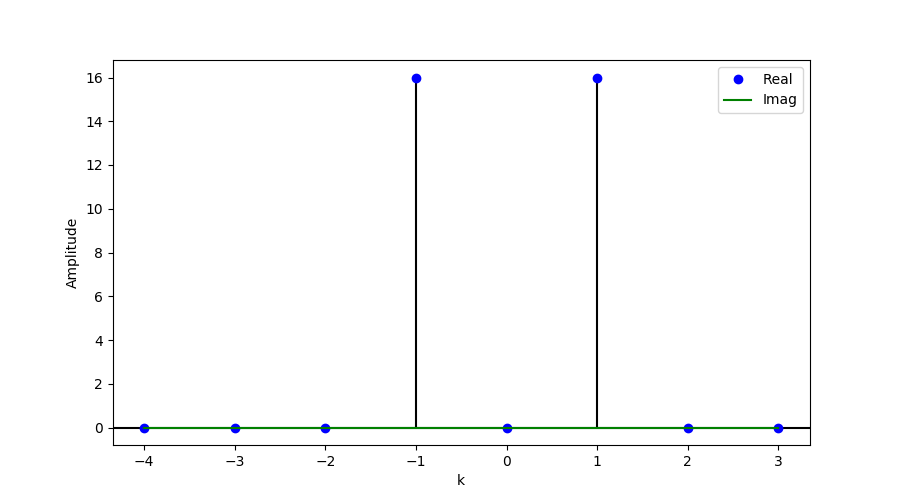

In [4]:
Pk = Xk*np.conj(Xk)

fig2,ax2 = plt.subplots(1,1)
ax2.axhline(0,c='k')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('k')

ax2.vlines(x=chan,ymin=0,ymax=np.real(Pk))
ax2.plot(chan,np.real(Pk),ls='None',marker='o',c='b',label='Real')
ax2.plot(chan,np.imag(Pk),c='g',label='Imag')
ax2.legend()

# Spectral Resolution

We have been representing the frequency channels by $k$ (the bin number of the frequency channel) so far. It is time we associated more meaning to this number. Every channel is representing a distinct frequency that is determined by the time length of the input signal. The frequency resolution is given by: 

$$\Delta \nu = \frac{1}{T}$$

Hence the frequencies range from $-\frac{N}{2}\Delta \nu$ to $+\frac{N}{2}\Delta \nu$. Let us replot the power spectrum with the right frequency spacing and see if our computation shows power at the right frequency.

**Note**: In the above pieces of code I adjusted the inclusion of the last frequency bin to have a frequency channel centered at zero for clarity.

(1.0, array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.]))


<IPython.core.display.Javascript object>


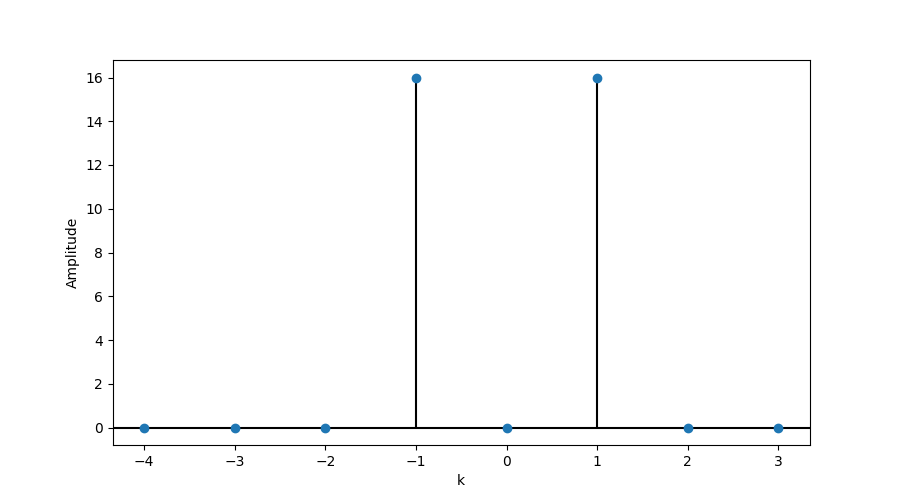

In [5]:
dv = 1.0/T0  #Resolution
v = chan*dv  # Frequency array

print (dv, v)

fig3,ax3 = plt.subplots(1,1)
ax3.axhline(0,c='k')
ax3.set_ylabel('Amplitude')
ax3.set_xlabel('k')

ax3.vlines(x=v,ymin=0,ymax=np.real(Pk))
ax3.plot(v,np.real(Pk),ls='None',marker='o')

# Spectral Leakage

Go back to the first (well, second) block of code. Change the frequency to a non-integer value (say, 23.3) and fix the number of points such that you are sampling faster than the Nyquist frequency (you should know how to compute this by now). Does a single frequency channel light up or multiple?

When the frequency/frequencies of your input signal do not exactly match the frequency bins of your fourier transform the power "leaks" into nearby bins. Note that **this is not aliasing**. Spectral leakage is a problem over and above aliasing.